In [1]:
import pandas as pd
import matplotlib.pyplot as plt

log_headers = ["timesteps", "action", "latency", "file_path", "num_query"]

In [2]:
def parse_func_name(func_name_str):
    # Func:'load_index' => "load_index"
    str_l = func_name_str.split(":")
    if "completed" in func_name_str:
        return func_name_str
    return str_l[-1][1:-1]

def parse_latency(time_str):
    return float(time_str[:-1])

def create_gantt_chart(load_index_hbars, search_index_hbars, figsize=(8, 1), ax=None, vline=True):
    return_ax = False
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
        return_ax = True

    bar_width = 0.5
    bar_gap = 0.0
    # [(x, length), ()], (y, bar_width)
    ax.broken_barh(load_index_hbars[:], (1, bar_width), facecolors =('darkorange'))
    ax.broken_barh(search_index_hbars[:], (1+bar_width+bar_gap, bar_width), facecolors =('green'))

    ax.set_yticks([1+bar_width/2, 1+bar_width+bar_gap+bar_width/2], ['load', 'search'])
    # ax.grid(True, alpha=0.5)

    if vline:
        last_x = search_index_hbars[-1][0]+search_index_hbars[-1][1]
        ax.axvline(x=last_x, color='black', linestyle='--', alpha=1)

    if return_ax:
        return fig, ax
    return ax

In [3]:
# read log file without header
df = pd.read_csv('../logs/st_index_1_batch.log', header=None)

# change column name
df.columns = log_headers

df["action"] = df["action"].map(parse_func_name)
df["latency"] = df["latency"].map(parse_latency)

# make a new column for the cumulative sum of the latency
df["cumulative_latency"] = df["latency"].cumsum()
df["start_time"] = df["cumulative_latency"] - df["latency"]

df.head()

,timesteps,action,latency,file_path,num_query,cumulative_latency,start_time
0,2024-04-10 20:15:27,load_index,0.000393,shards/idxs/embeds_centroids.index,0,0.000393,0.000000
1,2024-04-10 20:15:27,query_index,0.055503,shards/idxs/embeds_centroids.index,10000,0.055896,0.000393
2,2024-04-10 20:15:28,load_index,0.004287,shards/idxs/embeds_287.index,0,0.060183,0.055896
3,2024-04-10 20:15:28,query_index,0.008851,shards/idxs/embeds_287.index,2750,0.069033,0.060183
4,2024-04-10 20:15:28,load_index,0.004655,shards/idxs/embeds_182.index,0,0.073688,0.069033


In [4]:
load_index_hbars = []
search_index_hbars = []

for i, row in df[df["action"] == "load_index"].iterrows():
    load_index_hbars.append((row["start_time"], row["latency"]))

for i, row in df[df["action"] == "query_index"].iterrows():
    search_index_hbars.append((row["start_time"], row["latency"]))

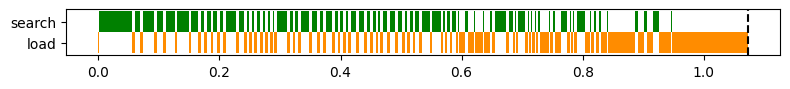

In [5]:
fig, ax = create_gantt_chart(load_index_hbars, search_index_hbars, ax=None)
fig.tight_layout()
plt.show()

In [6]:
# read log file without header
df = pd.read_csv('../logs/st_query_1_batch.log', header=None)

# change column name
df.columns = log_headers

df["action"] = df["action"].map(parse_func_name)
df["latency"] = df["latency"].map(parse_latency)

# make a new column for the cumulative sum of the latency
df["cumulative_latency"] = df["latency"].cumsum()
df["start_time"] = df["cumulative_latency"] - df["latency"]

In [7]:
# load_index_hbars2 = []
# search_index_hbars2 = []
# for idx, row in df.iterrows():
#     start_time = row["cumulative_latency"] - row["latency"]
#     if row["action"] == "load_index":
#         load_index_hbars2.append((start_time, row["latency"]))
#     elif row["action"] == "query_index":
#         search_index_hbars2.append((start_time, row["latency"]))

load_index_hbars2 = []
search_index_hbars2 = []

for i, row in df[df["action"] == "load_index"].iterrows():
    load_index_hbars2.append((row["start_time"], row["latency"]))

for i, row in df[df["action"] == "query_index"].iterrows():
    search_index_hbars2.append((row["start_time"], row["latency"]))

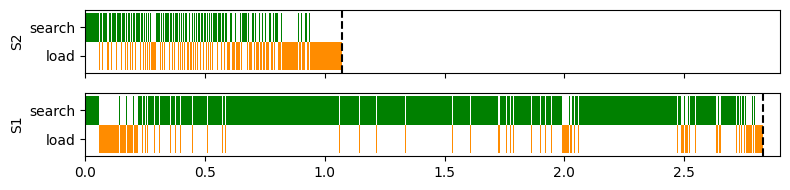

In [8]:
# make subplot 2 columns
fig, ax = plt.subplots(2, 1, figsize=(8, 2))
ax[0] = create_gantt_chart(load_index_hbars, search_index_hbars, ax=ax[0])
ax[1] = create_gantt_chart(load_index_hbars2, search_index_hbars2, ax=ax[1])


# remove xticks from the first subplot
plt.setp(ax[0].get_xticklabels(), visible=False)

# set xlim for the second subplot
max_x = 2.9
ax[1].set_xlim(-0., max_x)
ax[0].set_xlim(-0., max_x)

# set xlabel for the second subplot
ax[0].set_ylabel("S2")
ax[1].set_ylabel("S1")
# ax[1].set_xlabel("Time (s)")

fig.tight_layout()
# fig.savefig("test.pdf")
fig.show()